# Conteo de eventos en torres cercanas a la línea 6 del metro

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import matplotlib.pyplot as plt
import numpy as np
import glob
from shapely import wkt

/home/jsepulveda/miniconda3/envs/myenv/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


### Se lee la información del día de prueba de CDR

In [2]:
archivos_csv = glob.glob('/home/jsepulveda/testday/*.csv.gz')
lista = []
for archivo in archivos_csv:
    datos = pd.read_csv(archivo)
    lista.append(datos)


### Se concatenan los dataframes de los usuarios para generar solo un dataframe

In [3]:
usuarios = pd.concat(lista, ignore_index = True)
usuarios.head()

,fecha,hora,dur,numa,numb,rin,rinhead,rintail,tipo
0,171010,193239,0,37a49038d6b3079a14a9876bade5c763be97bb0a028f57...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DEFLTE,DEFLT,E,D
1,171010,195241,0,37a49038d6b3079a14a9876bade5c763be97bb0a028f57...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DEFLTE,DEFLT,E,D
2,171010,201242,0,37a49038d6b3079a14a9876bade5c763be97bb0a028f57...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DEFLTE,DEFLT,E,D
3,171010,203242,0,37a49038d6b3079a14a9876bade5c763be97bb0a028f57...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DEFLTE,DEFLT,E,D
4,171010,205244,0,37a49038d6b3079a14a9876bade5c763be97bb0a028f57...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DEFLTE,DEFLT,E,D


## Conteo de eventos para torres a 500 metros de la Línea 6 del Metro

### Se carga la información con las torres cercanas a menos de 500 metros

In [22]:
torres_500 = pd.read_csv('/home/jsepulveda/torres_cercanas_500.csv')
torres_500['geometry'] = torres_500['geometry'].apply(wkt.loads)
torres_500_gdf = gpd.GeoDataFrame(torres_500, crs='epsg:4326')
torres_500_gdf.head()

,rinhead,geometry,NOM_COMUNA
0,11SEP,POINT (-70.61111 -33.42227),PROVIDENCIA
1,CAMCH,POINT (-70.60911 -33.41897),PROVIDENCIA
2,CCA1A,POINT (-70.60588 -33.41796),PROVIDENCIA
3,CCA1B,POINT (-70.60588 -33.41796),PROVIDENCIA
4,CCA1C,POINT (-70.60588 -33.41796),PROVIDENCIA


### Se intercectan los dataframes para contar las conexiones utilzando el nombre de la torre como intersección

In [23]:
data = usuarios.merge(torres_500_gdf, how = 'inner', on = 'rinhead')
data.head()

,fecha,hora,dur,numa,numb,rin,rinhead,rintail,tipo,geometry,NOM_COMUNA
0,171010,91316,422,44781ba848d16e65c5fd27547c134af49494b331510fd0...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DPTC2U3,DPTC2,U3,D,POINT (-70.65995 -33.47791),PEDRO AGUIRRE CERDA
1,171010,91316,422,44781ba848d16e65c5fd27547c134af49494b331510fd0...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DPTC2U3,DPTC2,U3,D,POINT (-70.65995 -33.47791),PEDRO AGUIRRE CERDA
2,171010,94316,371,44781ba848d16e65c5fd27547c134af49494b331510fd0...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DPTC2U9,DPTC2,U9,D,POINT (-70.65995 -33.47791),PEDRO AGUIRRE CERDA
3,171010,94316,371,44781ba848d16e65c5fd27547c134af49494b331510fd0...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DPTC2U9,DPTC2,U9,D,POINT (-70.65995 -33.47791),PEDRO AGUIRRE CERDA
4,171010,101316,275,44781ba848d16e65c5fd27547c134af49494b331510fd0...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DPTC2U3,DPTC2,U3,D,POINT (-70.65995 -33.47791),PEDRO AGUIRRE CERDA


### Se realiza el conteo de los dispositivos que se conectaron a estas torres

In [24]:
usuarios_por_torre = data.groupby(['rinhead']).agg({'numa':'nunique'}).reset_index()
usuarios_por_torre.head()

,rinhead,numa
0,11SEP,4748
1,AALIR,40
2,AGSTF,2468
3,AHMF2,9555
4,BAHF2,4677


## Conteo de eventos para torres a 1000 metros de la Línea 6 del Metro

### Se carga la información con las torres cercanas a menos de 1000 metros

In [4]:
torres_1000 = pd.read_csv('/home/jsepulveda/torres_cercanas_1000.csv')
torres_1000['geometry'] = torres_1000['geometry'].apply(wkt.loads)
torres_1000_gdf = gpd.GeoDataFrame(torres_1000, crs='epsg:4326')
torres_1000_gdf.head()

,rinhead,geometry,NOM_COMUNA
0,11SEP,POINT (-70.61111 -33.42227),PROVIDENCIA
1,ATICF,POINT (-70.60563 -33.42468),PROVIDENCIA
2,BARRO,POINT (-70.61785 -33.43059),PROVIDENCIA
3,BELET,POINT (-70.61900 -33.42553),PROVIDENCIA
4,CAMCH,POINT (-70.60911 -33.41897),PROVIDENCIA


### Se intercectan los dataframes para contar las conexiones utilzando el nombre de la torre como intersección

In [5]:
data = usuarios.merge(torres_1000_gdf, how = 'inner', on = 'rinhead')
data.head()

,fecha,hora,dur,numa,numb,rin,rinhead,rintail,tipo,geometry,NOM_COMUNA
0,171010,91316,422,44781ba848d16e65c5fd27547c134af49494b331510fd0...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DPTC2U3,DPTC2,U3,D,POINT (-70.65995 -33.47791),PEDRO AGUIRRE CERDA
1,171010,91316,422,44781ba848d16e65c5fd27547c134af49494b331510fd0...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DPTC2U3,DPTC2,U3,D,POINT (-70.65995 -33.47791),PEDRO AGUIRRE CERDA
2,171010,94316,371,44781ba848d16e65c5fd27547c134af49494b331510fd0...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DPTC2U9,DPTC2,U9,D,POINT (-70.65995 -33.47791),PEDRO AGUIRRE CERDA
3,171010,94316,371,44781ba848d16e65c5fd27547c134af49494b331510fd0...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DPTC2U9,DPTC2,U9,D,POINT (-70.65995 -33.47791),PEDRO AGUIRRE CERDA
4,171010,101316,275,44781ba848d16e65c5fd27547c134af49494b331510fd0...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DPTC2U3,DPTC2,U3,D,POINT (-70.65995 -33.47791),PEDRO AGUIRRE CERDA


### Se realiza el conteo de los dispositivos que se conectaron a estas torres

In [27]:
usuarios_por_torre = data.groupby(['rinhead']).agg({'numa':'nunique'}).reset_index()
usuarios_por_torre.head()

,rinhead,numa
0,11SEP,4748
1,AALIR,40
2,AGSTF,2468
3,AHMF2,9555
4,AJINE,7381


## Conteo de eventos para torres a 1500 metros de la Línea 6 del Metro


### Se carga la información con las torres cercanas a menos de 1500 metros

In [28]:
torres_1500 = pd.read_csv('/home/jsepulveda/torres_cercanas_1500.csv')
torres_1500['geometry'] = torres_1500['geometry'].apply(wkt.loads)
torres_1500_gdf = gpd.GeoDataFrame(torres_1500, crs='epsg:4326')
torres_1500_gdf.head()

,rinhead,geometry,NOM_COMUNA
0,11SEP,POINT (-70.61111 -33.42227),PROVIDENCIA
1,ATICF,POINT (-70.60563 -33.42468),PROVIDENCIA
2,BARRO,POINT (-70.61785 -33.43059),PROVIDENCIA
3,BELET,POINT (-70.61900 -33.42553),PROVIDENCIA
4,BUSIS,POINT (-70.62233 -33.42679),PROVIDENCIA


### Se intercectan los dataframes para contar las conexiones utilzando el nombre de la torre como intersección

In [29]:
data = usuarios.merge(torres_1500_gdf, how = 'inner', on = 'rinhead')
data.head()

,fecha,hora,dur,numa,numb,rin,rinhead,rintail,tipo,geometry,NOM_COMUNA
0,171010,91316,422,44781ba848d16e65c5fd27547c134af49494b331510fd0...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DPTC2U3,DPTC2,U3,D,POINT (-70.65995 -33.47791),PEDRO AGUIRRE CERDA
1,171010,91316,422,44781ba848d16e65c5fd27547c134af49494b331510fd0...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DPTC2U3,DPTC2,U3,D,POINT (-70.65995 -33.47791),PEDRO AGUIRRE CERDA
2,171010,94316,371,44781ba848d16e65c5fd27547c134af49494b331510fd0...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DPTC2U9,DPTC2,U9,D,POINT (-70.65995 -33.47791),PEDRO AGUIRRE CERDA
3,171010,94316,371,44781ba848d16e65c5fd27547c134af49494b331510fd0...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DPTC2U9,DPTC2,U9,D,POINT (-70.65995 -33.47791),PEDRO AGUIRRE CERDA
4,171010,101316,275,44781ba848d16e65c5fd27547c134af49494b331510fd0...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DPTC2U3,DPTC2,U3,D,POINT (-70.65995 -33.47791),PEDRO AGUIRRE CERDA


### Se realiza el conteo de los dispositivos que se conectaron a estas torres

In [30]:
usuarios_por_torre = data.groupby(['rinhead']).agg({'numa':'nunique'}).reset_index()
usuarios_por_torre.head()

,rinhead,numa
0,11SEP,4748
1,AALIR,40
2,AAMAC,49
3,AGSTF,2468
4,AGUAF,9489


# ##################################################################

### Segmentando conexiones segun horario

In [2]:
punta_mañana = pd.read_csv('/home/jsepulveda/files/conexiones_punta_mañana.csv')
punta_tarde = pd.read_csv('/home/jsepulveda/files/conexiones_punta_tarde.csv')
punta_mañana.head()

,index,fecha,hora,dur,numa,numb,rin,rinhead,rintail,tipo,geometry,NOM_COMUNA
0,114,171010,75934,77,d16f64e92674d3e006ab8b580f9e0ebc2160b0ea2c2a2c...,8fe9e8fb60bdb19f73da8f79bc6510bfdad1ddc04782a1...,DPTC2L1,DPTC2,L1,D,POINT (-70.65994532041064 -33.47790626151259),PEDRO AGUIRRE CERDA
1,115,171010,75934,77,d16f64e92674d3e006ab8b580f9e0ebc2160b0ea2c2a2c...,8fe9e8fb60bdb19f73da8f79bc6510bfdad1ddc04782a1...,DPTC2L1,DPTC2,L1,D,POINT (-70.65994532041064 -33.47790626151259),PEDRO AGUIRRE CERDA
2,116,171010,74935,8717,ec73365be412c488fd9a690b006610f2297975420cdb1f...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DPTC2L1,DPTC2,L1,D,POINT (-70.65994532041064 -33.47790626151259),PEDRO AGUIRRE CERDA
3,117,171010,74935,8717,ec73365be412c488fd9a690b006610f2297975420cdb1f...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DPTC2L1,DPTC2,L1,D,POINT (-70.65994532041064 -33.47790626151259),PEDRO AGUIRRE CERDA
4,118,171010,82244,252,ec73365be412c488fd9a690b006610f2297975420cdb1f...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DPTC2W7,DPTC2,W7,D,POINT (-70.65994532041064 -33.47790626151259),PEDRO AGUIRRE CERDA


In [3]:
set_punta = set(punta_mañana.numa.to_list())
lista_usuarios = list(set_punta)

In [4]:
lista_usuarios

['cb8d62473029767a77420b2f48b7119df5d6a018f3bccce0504bee5561d81f8a',
 '243bc8309c8be74d71c4932d20a61f7deafa70672c50aaa9ea4da9d3fee24f13',
 '5f7f483a501730f677589ad05e5ffe96b1387ab956ab4e52954d7503dc7e5b57',
 'a89c6f5179b0535b6f86d5172152b9ecd1110e67d8d9e0949430de14ab7d7ad6',
 'fabc20930fa6a92c8711573a3458ab8e86a6cfa83bd854574c751a63ee18770f',
 '3ee68541a2ffcc11131ce56ffe132dc31855f2957ca1d44c719637802ef92579',
 '36a71df3082e5adac1d41194114c93fd9d459412ee4e6b9003f122a377c530e2',
 '77421dbb33b904928466ee6b6b4af5f5299b0852aa91e2dbde635245cd333315',
 '383c9e1c69c435e16c03c8d009b3bebbfd15074c9344780e09d0ec93bd383e5b',
 '21cfc181d1b9b7290d86391856949b59ad092d9503f20c321a2767657a92946a',
 'c932251cc51d6d51577f69db12e1b495e832b5092d8d0744a3bb5d6bd2147e7d',
 '9b056b86ed7b0e4e5ce718e25fc676a804c516a0826537e67fba729e44d32238',
 '53061a452c29fc54746836f7626077e391afa2862b0883dbbff4b87d07fd2714',
 'ac528ae784d6ac1255c03e9ce8a605ca2db8b8babb248a444b8271567ccd08c5',
 '70c3dafa76a4b7e29cf913ff8c5a64df

In [5]:
usuario_mask = punta_mañana['numa'] == '96e2975dfaf5c276504bfc1ec3041abfd497f4b483549aeb0c6b38b01e9cbb84'
filtered = punta_mañana[usuario_mask]
filtered_count = filtered.groupby(['geometry']).agg({'index':'nunique'}).reset_index()
print(filtered_count)

                                        geometry  index
0                     POINT (-70.60159 -33.4184)      2
1  POINT (-70.60211019383063 -33.41708759070627)      2


In [6]:
filtered_count['geometry'] = filtered_count['geometry'].apply(wkt.loads)
filtered_gdf = gpd.GeoDataFrame(filtered_count, crs='epsg:4326')
coord_list_u = [[x,y] for x,y in zip(filtered_gdf['geometry'].x, filtered_gdf['geometry'].y)]
coord_list_u

[[-70.60159, -33.4184], [-70.60211019383063, -33.41708759070627]]

### Definiendo las densidades de POIS mediante KDE

In [7]:
recreacion_pois = pd.read_csv('/home/jsepulveda/files/recreacion_pois.csv')
recreacion_pois['geometry'] = recreacion_pois['geometry'].apply(wkt.loads)
recreacion_gdf = gpd.GeoDataFrame(recreacion_pois, crs='epsg:4326')
coord_list_r = [[x,y] for x,y in zip(recreacion_gdf['geometry'].x, recreacion_gdf['geometry'].y)]

In [8]:
educacion_pois = pd.read_csv('/home/jsepulveda/files/educacion_pois.csv')
educacion_pois['geometry'] = educacion_pois['geometry'].apply(wkt.loads)
educacion_gdf = gpd.GeoDataFrame(educacion_pois, crs='epsg:4326')
coord_list_e = [[x,y] for x,y in zip(educacion_gdf['geometry'].x, educacion_gdf['geometry'].y)]

In [9]:
torres_cercanas = pd.read_csv('/home/jsepulveda/torres_cercanas_1000.csv')
torres_cercanas['geometry'] = torres_cercanas['geometry'].apply(wkt.loads)
torres_cercanas_gdf = gpd.GeoDataFrame(torres_cercanas, crs='epsg:4326')
coord_list_t = [[x,y] for x,y in zip(torres_cercanas_gdf['geometry'].x, torres_cercanas_gdf['geometry'].y)]

In [10]:
from sklearn.neighbors import KernelDensity
import numpy as np

In [11]:
h = 0.5
kde_edu = KernelDensity(bandwidth=h, metric='haversine', kernel='gaussian', algorithm='ball_tree').fit(np.array(coord_list_e))
kde_recre = KernelDensity(bandwidth=h, metric='haversine', kernel='gaussian', algorithm='ball_tree').fit(np.array(coord_list_r))

In [14]:
promedio_u_edu = np.mean(np.exp(kde_edu.score_samples(np.array(coord_list_t))))
promedio_u_edu

0.6288690200666681

In [15]:
promedio_u_recre = np.mean(np.exp(kde_recre.score_samples(np.array(coord_list_t))))
promedio_u_recre

0.6316128099944733

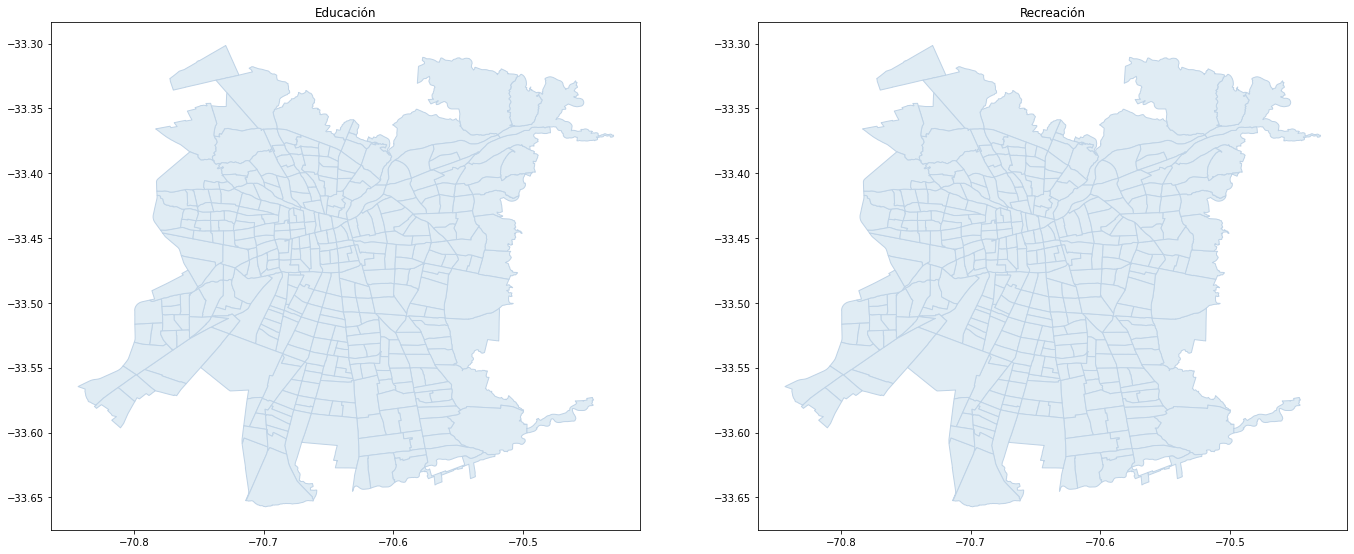

In [12]:
urban_distritos = gpd.read_file('/home/jsepulveda/urban_distritos.shp')
fig, ax = plt.subplots(1, 2, figsize=(20,20))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.2)
pois_names = ['Educación', 'Recreación']
coord = [coord_list_e, coord_list_r]
cmaps = ['Purples', 'Reds']

for i, axi in enumerate(ax):
    axi.set_title(pois_names[i])
    m = urban_distritos.plot(figsize=(20,20),linewidth=1, edgecolor='#bfd3e6', facecolor='#e0ecf4', ax = axi)
    kde = KernelDensity(bandwidth=h, metric='haversine', kernel='gaussian', algorithm='ball_tree').fit(np.array(coord[i]))
    
    